In [1]:
# %display latex

In [2]:
from IPython.display import display, Math, Latex

In [3]:
kappa = var("kappa")

z = var("z")
rh = var("rho")
ph = var("varphi")

c = var("c")
omega = var("omega")

h = var("h")
a = var("a")

m = var("m")
m_val = 0

In [4]:
def bessel_J_diff(m, arg):
    return bessel_J(m, x).diff(x).subs(x == arg)

In [5]:
exec(preparse("bessel_J_d = lambda m, x: " + str(bessel_J(m,x).diff(x)) +""))

In [6]:
n_layers = 2

In [7]:
mu = []
for i in range(n_layers):
    exec("mu_" + str(i) + "= var('mu_" + str(i) + "')")
    exec("mu += [mu_" + str(i) +"]")

In [8]:
epsilon = []
for i in range(n_layers):
    exec("epsilon_" + str(i) + "= var('epsilon_" + str(i) + "')")
    exec("epsilon += [epsilon_" + str(i) +"]")

In [9]:
A_z = []
for i in range(n_layers):
    exec("A_z_" + str(i) + "= var('A_z_" + str(i) + "')")
    exec("A_z += [A_z_" + str(i) +"]")

In [10]:
A_z

[A_z_0, A_z_1]

In [11]:
B_z = []
for i in range(n_layers):
    exec("B_z_" + str(i) + "= var('B_z_" + str(i) + "')")
    exec("B_z += [B_z_" + str(i) +"]")

In [12]:
B_z

[B_z_0, B_z_1]

In [13]:
k = []
for i in range(n_layers):
    exec("k_" + str(i) + "= var('k_" + str(i) + "')")
    exec("k += [k_" + str(i) +"]")

In [14]:
# исходя из вида дифференциальных уравнений для диэлектрика
# записываем соотнощения для волнового вектора в виде уравнений
eq_kappa = []
for i in range(n_layers):
    eq_kappa += [mu[i] * epsilon[i] * omega^2 / c^2 - k[i]^2 == kappa^2]

display(Math(latex(eq_kappa)))

<IPython.core.display.Math object>

In [15]:
E_rho = []
for i in range(n_layers):
    E_rho += [lambda rh,ph,z, i=i: k[i]/kappa * bessel_J_d(m,kappa*rh)*(-A_z[i]*sin(k[i]*z) + B_z[i]*cos(k[i]*z)) * sin(m*ph)]

In [16]:
E_phi = []
for i in range(n_layers):
    E_phi += [lambda rh,ph,z, i=i: m*k[i]/(kappa^2*rh) * bessel_J  (m,kappa*rh)*(-A_z[i]*sin(k[i]*z) + B_z[i]*cos(k[i]*z)) * cos(m*ph)]

In [17]:
E_rho[0](rh,ph,z)

-1/2*(B_z_0*cos(k_0*z) - A_z_0*sin(k_0*z))*k_0*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(m*varphi)/kappa

In [18]:
E_phi[0](rh,ph,z)

(B_z_0*cos(k_0*z) - A_z_0*sin(k_0*z))*k_0*m*bessel_J(m, kappa*rho)*cos(m*varphi)/(kappa^2*rho)

In [19]:
if 1 < n_layers:
    E_rho[1](rh,ph,z)

In [20]:
if 1 < n_layers:
    E_phi[1](rh,ph,z)

In [21]:
E_z = []
for i in range(n_layers):
    E_z += [lambda rh,ph,z, i=i: bessel_J  (m,kappa*rh)*( A_z[i]*cos(k[i]*z) + B_z[i]*sin(k[i]*z)) * sin(m*ph)]

In [22]:
E_z[0](rh,ph,z)

(A_z_0*cos(k_0*z) + B_z_0*sin(k_0*z))*bessel_J(m, kappa*rho)*sin(m*varphi)

In [23]:
if 1 < n_layers:
    E_z[1](rh,ph,z)

In [24]:
rotE_rho = []
for i in range(n_layers):
    exec(preparse("rotE_rho += [lambda rh,ph,z, i=i: " + str(E_z[i](rh,ph,z).diff(ph)/rh - E_phi[i](rh,ph,z).diff(z)) +"]"))

In [25]:
rotE_phi = []
for i in range(n_layers):
    exec(preparse("rotE_phi += [lambda rh,ph,z, i=i: " + str(E_rho[i](rh,ph,z).diff(z)-E_z[i](rh,ph,z).diff(rh)) +"]"))

In [26]:
rotE_z = []
for i in range(n_layers):
    exec(preparse("rotE_z += [lambda rh,ph,z, i=i: " + str(((rh*E_phi[i](rh,ph,z)).diff(rh) - E_rho[i](rh,ph,z).diff(ph))/rh) +"]"))

In [27]:
rotE_phi[0](rh,ph,z)

1/2*(A_z_0*cos(k_0*z) + B_z_0*sin(k_0*z))*kappa*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(m*varphi) + 1/2*(A_z_0*k_0*cos(k_0*z) + B_z_0*k_0*sin(k_0*z))*k_0*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(m*varphi)/kappa

In [28]:
if 1 < n_layers:
    rotE_phi[1](rh,ph,z)

In [29]:
rotE_rho[0](rh,ph,z)

(A_z_0*cos(k_0*z) + B_z_0*sin(k_0*z))*m*bessel_J(m, kappa*rho)*cos(m*varphi)/rho + (A_z_0*k_0*cos(k_0*z) + B_z_0*k_0*sin(k_0*z))*k_0*m*bessel_J(m, kappa*rho)*cos(m*varphi)/(kappa^2*rho)

In [30]:
rotE_z[0](rh,ph,z)

0

In [31]:
H_rh = []
for i in range(n_layers):
    H_rh += [lambda rh,ph,z, i=i : rotE_rho[i](rh,ph,z)*c/(I*omega *mu[i])]

In [32]:
H_ph = []
for i in range(n_layers):
    H_ph += [lambda rh,ph,z, i=i : rotE_phi[i](rh,ph,z)*c/(I*omega *mu[i])]

In [33]:
H_z = []
for i in range(n_layers):
    H_z += [lambda rh,ph,z, i=i : rotE_z[i](rh,ph,z)*c/(I*omega *mu[i])]

In [34]:
H_rh[0](rh,ph,z).factor()

-I*(k_0^2 + kappa^2)*(A_z_0*cos(k_0*z) + B_z_0*sin(k_0*z))*c*m*bessel_J(m, kappa*rho)*cos(m*varphi)/(kappa^2*mu_0*omega*rho)

In [35]:
if 1 < n_layers:
    H_rh[1](rh,ph,z)

In [36]:
display(Math(latex(H_ph[0](rh,ph,z).factor())))

<IPython.core.display.Math object>

In [37]:
H_ph[0](rh,ph,z).subs(m == 0, B_z[0] == 0)

0

In [38]:
if 1 < n_layers:
    H_ph[1](rh,ph,z)

In [39]:
H_z[0](rh,ph,z)

0

In [40]:
if 1 < n_layers:
    H_z[1](rh,ph,z)

In [41]:
# граничные условия
# тангенциальная компонента электрического поля
eq_Erh_superconductor_boundary_conditions = []
eq_Erh_superconductor_boundary_conditions += [E_rho[0](rh,ph,0) == 0.0]
eq_Erh_superconductor_boundary_conditions += [E_rho[n_layers - 1](rh,ph,h*n_layers) == 0.0]

eq_Eph_superconductor_boundary_conditions = []
eq_Eph_superconductor_boundary_conditions += [E_phi[0](rh,ph,0) == 0.0]
eq_Eph_superconductor_boundary_conditions += [E_phi[n_layers - 1](rh,ph,h*n_layers) == 0.0]

display(Math(latex(eq_Erh_superconductor_boundary_conditions)))
display(Math(latex(eq_Eph_superconductor_boundary_conditions)))

boundary_Erh_subs_begin = solve(eq_Erh_superconductor_boundary_conditions[0], B_z[0])
boundary_Erh_subs_end = solve(eq_Erh_superconductor_boundary_conditions[1], B_z[n_layers - 1])

boundary_Eph_subs_begin = solve(eq_Eph_superconductor_boundary_conditions[0], B_z[0])
boundary_Eph_subs_end = solve(eq_Eph_superconductor_boundary_conditions[1], B_z[n_layers - 1])

display(Math(latex(boundary_Erh_subs_begin)))
display(Math(latex(boundary_Erh_subs_end)))

display(Math(latex(boundary_Eph_subs_begin)))
display(Math(latex(boundary_Eph_subs_end)))

boundary_conductor = boundary_Erh_subs_begin + boundary_Erh_subs_end
#boundary_conductor += boundary_Eph_subs_begin + boundary_Eph_subs_end
display(Math(latex(boundary_conductor)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [42]:
# exclude_vars = [A_r[0], A_r[n_layers - 1], A_p[0], A_p[n_layers - 1]]
exclude_vars = []

In [43]:
def my_simplify(v):
    print ("v =", v)
    from sage.symbolic.operators import add_vararg, mul_vararg

    operand_list1 = []
    operand_list2 = []

    if mul_vararg == v.operator():
        for operand in v.operands():
            op = operand.operator()
            if op == add_vararg:
                operand_list1 += [(op, operand)]
            else:
                operand_list2 += [(op, operand)]
    res_list = ()
    if len(operand_list1) == 1:
        for (op1, operand1) in operand_list1:
            print (op1, operand1)
            print ("")
            for operand1_operand in operand1.operands():
                print(operand1_operand)
                res1 = operand1_operand
                for (op2, operand2) in operand_list2:
                    print (op2, operand2)
                    res1 = mul_vararg(res1, operand2)
                print ("")
                print ("res1 = ", res1)
                print ("")
                res_list += (res1,)
    print (res_list)
    if len (res_list) > 0:
        res = add_vararg(*res_list)
    else:
        res = v
    print(res)
    return res
    

In [44]:
def my_simp(i, ml, v):
    print ("v =", v)
    return my_simplify((v / ml).full_simplify() \
             .subs(2*sin(h*k[i])^2 - 1 == sin(h*k[i])^2 - cos(h*k[i])^2) \
             .subs(2*cos(h*k[i])^2 - 1 == cos(h*k[i])^2 - sin(h*k[i])^2)) \
             *ml

In [45]:
def my_subs(i, ml, lm, v):
    print ("v =", v)
    vv = (v / ml).full_simplify()
    vvv = vv.subs(2*sin(h*k[i])^2 - 1 == sin(h*k[i])^2 - cos(h*k[i])^2) \
            .subs(2*cos(h*k[i])^2 - 1 == cos(h*k[i])^2 - sin(h*k[i])^2)
    for mm in lm:
        vvv = vvv.subs(((2*sin(h*k[i])^2 - 1) * mm).expand() == (sin(h*k[i])^2 - cos(h*k[i])^2) * mm)
        vvv = vvv.subs(((2*cos(h*k[i])^2 - 1) * mm).expand() == (cos(h*k[i])^2 - sin(h*k[i])^2) * mm)
    return vvv * ml

In [46]:
rotH_rh = []
for i in range(n_layers):
    exec(preparse("rotH_rh += [lambda rh,ph,z, i=i : " + str(H_z[i](rh,ph,z).diff(ph)/rh - H_ph[i](rh,ph,z).diff(z)) + "]"))

In [47]:
rotH_ph = []
for i in range(n_layers):
    exec(preparse("rotH_ph += [lambda rh,ph,z, i=i: " + str(H_rh[i](rh,ph,z).diff(z)-H_z[i](rh,ph,z).diff(rh)) +"]"))

In [48]:
rotH_z = []
for i in range(n_layers):
    exec(preparse("rotH_z += [lambda rh,ph,z, i=i : "+ str(((rh * H_ph[i](rh,ph,z)).diff(rh) - H_rh[i](rh,ph,z).diff(ph))/rh) + "]"))

In [49]:
eq_rotH_ph = []
for i in range(n_layers):
    eq_rotH_ph += [rotH_ph[i](rh,ph,z) == -I * omega / c * epsilon[i] * E_phi[i](rh,ph,z) ]

In [50]:
eq_rotH_rh = []
for i in range(n_layers):
    eq_rotH_rh += [rotH_rh[i](rh,ph,z) == -I * omega / c * epsilon[i] * E_rho[i](rh,ph,z) ]

In [51]:
eq_rotH_z = []
for i in range(n_layers):
    eq_rotH_z += [rotH_z[i](rh,ph,z) - I * omega / c * epsilon[i] * E_z[i](rh,ph,z) == 0]

In [52]:
rotH_ph[0](rh,ph,z)

(-I*(B_z_0*k_0*cos(k_0*z) - A_z_0*k_0*sin(k_0*z))*m*bessel_J(m, kappa*rho)*cos(m*varphi)/rho - I*(B_z_0*k_0^2*cos(k_0*z) - A_z_0*k_0^2*sin(k_0*z))*k_0*m*bessel_J(m, kappa*rho)*cos(m*varphi)/(kappa^2*rho))*c/(mu_0*omega)

In [53]:
if 1 < n_layers:
    rotH_ph[1](rh,ph,z)

In [54]:
rotH_rh[0](rh,ph,z)

-1/2*(-I*(B_z_0*k_0*cos(k_0*z) - A_z_0*k_0*sin(k_0*z))*kappa*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(m*varphi) - I*(B_z_0*k_0^2*cos(k_0*z) - A_z_0*k_0^2*sin(k_0*z))*k_0*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(m*varphi)/kappa)*c/(mu_0*omega)

In [55]:
if 1 < n_layers:
    rotH_rh[1](rh,ph,z)

In [56]:
rotH_z[0](rh,ph,z)

-1/4*((-I*(kappa*(bessel_J(m + 2, kappa*rho) - bessel_J(m, kappa*rho)) + kappa*(bessel_J(m - 2, kappa*rho) - bessel_J(m, kappa*rho)))*(A_z_0*cos(k_0*z) + B_z_0*sin(k_0*z))*kappa*sin(m*varphi) - I*(A_z_0*k_0*cos(k_0*z) + B_z_0*k_0*sin(k_0*z))*(kappa*(bessel_J(m + 2, kappa*rho) - bessel_J(m, kappa*rho)) + kappa*(bessel_J(m - 2, kappa*rho) - bessel_J(m, kappa*rho)))*k_0*sin(m*varphi)/kappa)*c*rho/(mu_0*omega) + (2*I*(A_z_0*cos(k_0*z) + B_z_0*sin(k_0*z))*kappa*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(m*varphi) + 2*I*(A_z_0*k_0*cos(k_0*z) + B_z_0*k_0*sin(k_0*z))*k_0*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(m*varphi)/kappa)*c/(mu_0*omega) + (4*I*(A_z_0*cos(k_0*z) + B_z_0*sin(k_0*z))*m^2*bessel_J(m, kappa*rho)*sin(m*varphi)/rho + 4*I*(A_z_0*k_0*cos(k_0*z) + B_z_0*k_0*sin(k_0*z))*k_0*m^2*bessel_J(m, kappa*rho)*sin(m*varphi)/(kappa^2*rho))*c/(mu_0*omega))/rho

In [57]:
if 1 < n_layers:
    rotH_z[1](rh,ph,z)

In [58]:
eq_rotH_z

[-I*(A_z_0*cos(k_0*z) + B_z_0*sin(k_0*z))*epsilon_0*omega*bessel_J(m, kappa*rho)*sin(m*varphi)/c - 1/4*((-I*(kappa*(bessel_J(m + 2, kappa*rho) - bessel_J(m, kappa*rho)) + kappa*(bessel_J(m - 2, kappa*rho) - bessel_J(m, kappa*rho)))*(A_z_0*cos(k_0*z) + B_z_0*sin(k_0*z))*kappa*sin(m*varphi) - I*(A_z_0*k_0*cos(k_0*z) + B_z_0*k_0*sin(k_0*z))*(kappa*(bessel_J(m + 2, kappa*rho) - bessel_J(m, kappa*rho)) + kappa*(bessel_J(m - 2, kappa*rho) - bessel_J(m, kappa*rho)))*k_0*sin(m*varphi)/kappa)*c*rho/(mu_0*omega) + (2*I*(A_z_0*cos(k_0*z) + B_z_0*sin(k_0*z))*kappa*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(m*varphi) + 2*I*(A_z_0*k_0*cos(k_0*z) + B_z_0*k_0*sin(k_0*z))*k_0*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(m*varphi)/kappa)*c/(mu_0*omega) + (4*I*(A_z_0*cos(k_0*z) + B_z_0*sin(k_0*z))*m^2*bessel_J(m, kappa*rho)*sin(m*varphi)/rho + 4*I*(A_z_0*k_0*cos(k_0*z) + B_z_0*k_0*sin(k_0*z))*k_0*m^2*bessel_J(m, kappa*rho)*sin(m*varphi)/(kappa^2*rho))*c/(mu_0*omega))/r

In [59]:
H_rho = []
for i in range(n_layers):
    H_rho += [lambda rh,ph,z, i=i : I*m*omega*epsilon[i]/(kappa^2*c*rh) * bessel_J  (m,kappa*rh)*(-A_z[i]*cos(k[i]*z) - B_z[i]*sin(k[i]*z)) * cos(m*ph)]

In [60]:
H_phi = []
for i in range(n_layers):
    H_phi += [lambda rh,ph,z, i=i : I*omega*epsilon[i]/(kappa*c) * bessel_J_d(m,kappa*rh)*( A_z[i]*cos(k[i]*z) + B_z[i]*sin(k[i]*z)) * sin(m*ph)]

In [61]:
H_zz = []
for i in range(n_layers):
    H_zz += [lambda rh,ph,z, i=i : 0]

In [62]:
rotH_rho = []
for i in range(n_layers):
    exec(preparse("rotH_rho += [lambda rh,ph,z, i=i : " + str(diff(H_zz[i](rh,ph,z),ph)/rh - H_phi[i](rh,ph,z).diff(z)) + "]"))

In [63]:
rotH_phi = []
for i in range(n_layers):
    exec(preparse("rotH_phi += [lambda rh,ph,z, i=i: " + str(H_rho[i](rh,ph,z).diff(z)-diff(H_zz[i](rh,ph,z),rh)) +"]"))

In [64]:
rotH_zz = []
for i in range(n_layers):
    exec(preparse("rotH_zz += [lambda rh,ph,z, i=i : "+ str(((rh * H_phi[i](rh,ph,z)).diff(rh) - H_rho[i](rh,ph,z).diff(ph))/rh) + "]"))

In [65]:
eq_rotH_phi = []
for i in range(n_layers):
    eq_rotH_phi += [rotH_phi[i](rh,ph,z) == -I * omega / c * epsilon[i] * E_phi[i](rh,ph,z) ]

In [66]:
eq_rotH_rho = []
for i in range(n_layers):
    eq_rotH_rho += [rotH_rho[i](rh,ph,z) == -I * omega / c * epsilon[i] * E_rho[i](rh,ph,z) ]

In [67]:
eq_rotH_zz = []
for i in range(n_layers):
    eq_rotH_zz += [rotH_zz[i](rh,ph,z) - I * omega / c * epsilon[i] * E_z[i](rh,ph,z) == 0]

In [68]:
if 1 < n_layers:
    display(Math(latex(E_rho[1](rh,ph,z))))

<IPython.core.display.Math object>

In [69]:
if 1 < n_layers:
    display(Math(latex(E_z[1](rh,ph,z))))

<IPython.core.display.Math object>

In [70]:
if 1 < n_layers:
    H_rho[1](rh,ph,z)

In [71]:
if 1 < n_layers:
    H_phi[1](rh,ph,z)

In [72]:
if 1 < n_layers:
    H_zz[1](rh,ph,z)

In [73]:
eq_rotH_phi

[(-I*B_z_0*k_0*cos(k_0*z) + I*A_z_0*k_0*sin(k_0*z))*epsilon_0*m*omega*bessel_J(m, kappa*rho)*cos(m*varphi)/(c*kappa^2*rho) == -I*(B_z_0*cos(k_0*z) - A_z_0*sin(k_0*z))*epsilon_0*k_0*m*omega*bessel_J(m, kappa*rho)*cos(m*varphi)/(c*kappa^2*rho),
 (-I*B_z_1*k_1*cos(k_1*z) + I*A_z_1*k_1*sin(k_1*z))*epsilon_1*m*omega*bessel_J(m, kappa*rho)*cos(m*varphi)/(c*kappa^2*rho) == -I*(B_z_1*cos(k_1*z) - A_z_1*sin(k_1*z))*epsilon_1*k_1*m*omega*bessel_J(m, kappa*rho)*cos(m*varphi)/(c*kappa^2*rho)]

In [74]:
eq_rotH_rho

[-1/2*(-I*B_z_0*k_0*cos(k_0*z) + I*A_z_0*k_0*sin(k_0*z))*epsilon_0*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(m*varphi)/(c*kappa) == 1/2*I*(B_z_0*cos(k_0*z) - A_z_0*sin(k_0*z))*epsilon_0*k_0*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(m*varphi)/(c*kappa),
 -1/2*(-I*B_z_1*k_1*cos(k_1*z) + I*A_z_1*k_1*sin(k_1*z))*epsilon_1*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(m*varphi)/(c*kappa) == 1/2*I*(B_z_1*cos(k_1*z) - A_z_1*sin(k_1*z))*epsilon_1*k_1*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(m*varphi)/(c*kappa)]

In [75]:
eq_rotH_zz

[-I*(A_z_0*cos(k_0*z) + B_z_0*sin(k_0*z))*epsilon_0*omega*bessel_J(m, kappa*rho)*sin(m*varphi)/c - 1/4*((-I*kappa*(bessel_J(m + 2, kappa*rho) - bessel_J(m, kappa*rho)) - I*kappa*(bessel_J(m - 2, kappa*rho) - bessel_J(m, kappa*rho)))*(A_z_0*cos(k_0*z) + B_z_0*sin(k_0*z))*epsilon_0*omega*rho*sin(m*varphi)/(c*kappa) + (2*I*A_z_0*cos(k_0*z) + 2*I*B_z_0*sin(k_0*z))*epsilon_0*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(m*varphi)/(c*kappa) + (4*I*A_z_0*cos(k_0*z) + 4*I*B_z_0*sin(k_0*z))*epsilon_0*m^2*omega*bessel_J(m, kappa*rho)*sin(m*varphi)/(c*kappa^2*rho))/rho == 0,
 -I*(A_z_1*cos(k_1*z) + B_z_1*sin(k_1*z))*epsilon_1*omega*bessel_J(m, kappa*rho)*sin(m*varphi)/c - 1/4*((-I*kappa*(bessel_J(m + 2, kappa*rho) - bessel_J(m, kappa*rho)) - I*kappa*(bessel_J(m - 2, kappa*rho) - bessel_J(m, kappa*rho)))*(A_z_1*cos(k_1*z) + B_z_1*sin(k_1*z))*epsilon_1*omega*rho*sin(m*varphi)/(c*kappa) + (2*I*A_z_1*cos(k_1*z) + 2*I*B_z_1*sin(k_1*z))*epsilon_1*omega*(bessel_J(m + 1, kappa*rho) 

In [76]:
def rot_H_solve(M_rotH, vars, eq_kappa, k):
    # print("M_rotH =")
    # display(Math(latex(M_rotH)))

    if (M_rotH.ncols() != len(vars)):
        return

    n = M_rotH.nrows()

    xx = vector(SR, vars)
    yy = zero_vector(SR, n)
    eqns = [(M_rotH*xx)[index] == yy[index] for index in range(n)]
    # display(Math(latex(eqns)))
    res = []

    for index in range(n):
        row_M = M_rotH[index]
        # print("row_M =")
        # display(Math(latex(row_M)))
        eq = eqns[index].full_simplify()
        #print ("eq =")
        #display(Math(latex(eq)))
        #print ("")
        
        if 0 == eq.lhs() and 0 == eq.rhs():
            continue
        
        for var in vars:
            # print ("var =")
            # display(Math(latex(var)))
            sol = solve(eq, var)
            if len(sol) > 0:
                print("sol=")
                display(Math(latex(sol[0])))

        continue

        solved = False

        eq2 = (eq / cos(k * z)).full_simplify().expand()
        # print ("eq2 =")
        # display(Math(latex(eq2)))

        tg_k_z_coeff = eq2.lhs().coefficient(sin(k * z) / cos(k * z))

        if 0 == tg_k_z_coeff:
            continue

        print ("tg_k_z_coeff =")
        display(Math(latex(tg_k_z_coeff)))
        


        eq_tg_k_z_coeff = tg_k_z_coeff == 0
        for var in vars:
            # print ("var =")
            # display(Math(latex(var)))
            sol_tg_k_z_coeff = solve(eq_tg_k_z_coeff, var)
            if len(sol_tg_k_z_coeff) > 0:
                #print("sol_tg_k_z_coeff=")
                #display(Math(latex(sol_tg_k_z_coeff)))

                res += sol_tg_k_z_coeff           

                eq4 = eq.subs(sol_tg_k_z_coeff)
                # print ("eq4 =")
                # display(Math(latex(eq4)))

                eq4 = eq4.full_simplify()

                if 0 == eq4.lhs() and 0 == eq4.rhs():
                    solved = True
                    continue

                #print ("eq4 =")
                #display(Math(latex(eq4)))
                for var in vars:
                    if var in eq4.variables():
                        # print ("var =")
                        # display(Math(latex(var)))
                        # print ("")
                        sol = solve(eq4, var)

                        # print ("")
                        if len(sol)>0:
                            if z not in sol[0].rhs().variables():
                                #print("sol=")
                                #display(Math(latex(sol)))
                                res += sol
                                solved = True

        if not solved:
            print ("unsolved eq =")
            print(eq)
    # print ("res=", res)
    return res

In [77]:
def GenerateMatrix(equsys, vars):
    A=matrix(SR, [[(equ.lhs() - equ.rhs()).coefficient(v) for v in vars] for equ in equsys])
    return A

In [78]:
res_rot_H = []
eqs_rot_H = []
for i in range(n_layers):
    eqs_rotH = [(eq_rotH_rho[i]*(-I)*omega/c).full_simplify(), # .subs(solve(eq_kappa[i], omega^2))
                (eq_rotH_phi[i]*(-I)*omega/c).full_simplify(),
                (eq_rotH_zz [i]*(-I)*omega/c).full_simplify(),
               ]
    eqs_rot_H += eqs_rotH

    vars_dielectric = [A_z[i], B_z[i]]

    vars_dielectric = [var for var in vars_dielectric if var not in exclude_vars]
    display(Math(latex(vars_dielectric)))
    M_rotH = GenerateMatrix(eqs_rotH, vars_dielectric)
    #print ("M_rotH =")
    #display(Math(latex(M_rotH)))
    print ("M_rotH.nrows =", M_rotH.nrows())
    print ("M_rotH.ncols =", M_rotH.ncols())
    print ("M_rotH.rank =", M_rotH.rank())

    res_rot_H += rot_H_solve(M_rotH, vars_dielectric, eq_kappa[i], k[i])

<IPython.core.display.Math object>

M_rotH.nrows = 3
M_rotH.ncols = 2
M_rotH.rank = 1
sol=


<IPython.core.display.Math object>

sol=


<IPython.core.display.Math object>

<IPython.core.display.Math object>

M_rotH.nrows = 3
M_rotH.ncols = 2
M_rotH.rank = 1
sol=


<IPython.core.display.Math object>

sol=


<IPython.core.display.Math object>

In [79]:
display(Math(latex(res_rot_H)))

<IPython.core.display.Math object>

In [80]:
all_vars = []
for i in range(n_layers):
    all_vars += [A_z[i], B_z[i]]
    
all_vars = [var for var in all_vars if var not in exclude_vars]
all_vars

[A_z_0, B_z_0, A_z_1, B_z_1]

In [81]:
M_res_rot_H = GenerateMatrix(res_rot_H, all_vars)
# display(Math(latex(M_res_rot_H)))

In [82]:
def reduceDependedRows(M):
    print ("")
    print ("M.nrows()", M.nrows())
    print ("M.ncols()", M.ncols())
    print ("M.rank()", M.rank())

    M_pivot_rows = M.pivot_rows()
    print ("M.pivot_rows() =", M_pivot_rows)

    M_rows = M.rows()
    #for row in M_rows:
    #    print("row =")
    #    display(Math(latex(row)))

    reduced_list = []
    for r in M_pivot_rows:
        #print ("M_rows[", r, "] =")
        #display(Math(latex(M_rows[r])))
        reduced_list.append(M_rows[r])

    reduced_M = matrix(SR, len(M_pivot_rows), M.ncols(), reduced_list)
    #if reduced_M.nrows() == reduced_M.ncols():
        #reduced_M_det = reduced_M.det()
        #print ("")
        #print ("reduced_M.det() =")
        #display(Math(latex(reduced_M_det)))
    return reduced_M

In [83]:
reduced_M_res_rot_H = reduceDependedRows(M_res_rot_H)


M.nrows() 0
M.ncols() 0
M.rank() 0
M.pivot_rows() = ()


In [84]:
reduced_M_res_rot_H.nrows(), reduced_M_res_rot_H.ncols(), reduced_M_res_rot_H.rank()

(0, 0, 0)

In [85]:
# display(Math(latex(reduced_M_res_rot_H)))

In [86]:
reduced_M_res_rot_H

[]

In [87]:
def make_eqsys_from_reduced_M(M_rotH, vars):
    xx = vector(SR, vars)
    # print("eqns =")
    eqns = [(M_rotH*xx)[index] == 0 for index in range(M_rotH.nrows())]
    # display(Math(latex(eqns)))
    return (eqns)

In [88]:
eqsys_rotH_simplified = make_eqsys_from_reduced_M(reduced_M_res_rot_H, all_vars)

In [89]:
eqsys_rotH_simplified

[]

In [90]:
eqsys_rotH_subs = []
for eq_rotH_simplified in eqsys_rotH_simplified:
    for var in B_z:
        if var in eq_rotH_simplified.variables():
            print(var)
            solve_current_var = True
            for eqsys_rotH_subs_i in eqsys_rotH_subs:
                print(eqsys_rotH_subs_i.lhs().variables())
                if var in eqsys_rotH_subs_i.lhs().variables():
                    solve_current_var = False
            if solve_current_var:
                eqsys_rotH_subs += solve (eq_rotH_simplified,var)

display(Math(latex(eqsys_rotH_subs)))

<IPython.core.display.Math object>

In [91]:
bch = []
bc =  []
for i  in range (n_layers-1):
    bc += [(E_rho[i](rh,ph, (i + 1) * h) == E_rho[i+1](rh,ph,(i+1)*h)).subs(boundary_conductor)]
    bc += [(E_phi[i](rh,ph, (i + 1) * h) == E_phi[i+1](rh,ph,(i+1)*h)).subs(boundary_conductor)]
    bc += [(epsilon[i] * E_z[i](rh,ph,(i+1)*h) == epsilon[i+1]*E_z[i+1](rh,ph,(i+1)*h)).subs(boundary_conductor)]

    bch += [(H_phi [i](rh,ph,(i+1)*h) == H_phi [i+1](rh,ph,(i+1)*h)).subs(boundary_conductor)]

In [92]:
display(Math(latex(bc)))

<IPython.core.display.Math object>

In [93]:
bch

[-1/2*I*A_z_0*epsilon_0*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(h*k_0)*sin(m*varphi)/(c*kappa) == -1/2*I*(A_z_1*cos(h*k_1) + A_z_1*sin(2*h*k_1)*sin(h*k_1)/cos(2*h*k_1))*epsilon_1*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(m*varphi)/(c*kappa)]

In [94]:
        # + bch \
all_eqs = bc \
        + boundary_conductor# \
        #+ eqsys_rotH_simplified

#display(Math(latex(all_eqs)))

In [95]:
M = GenerateMatrix(all_eqs, all_vars)

In [96]:
display(Math(latex(M)))

<IPython.core.display.Math object>

In [97]:
M.nrows(), M.ncols(), len(all_vars)

(5, 4, 4)

In [98]:
M.rank()

4

In [99]:
reduced_M = reduceDependedRows(M)


M.nrows() 5
M.ncols() 4
M.rank() 4
M.pivot_rows() = (0, 2, 3, 4)


In [100]:
reduced_M.nrows(), reduced_M.ncols(),

(4, 4)

In [101]:
reduced_M.pivots()

(0, 1, 2, 3)

In [102]:
def reduceEmptyCols(M, vars):
    print ("")
    print ("M.nrows()", M.nrows())
    print ("M.ncols()", M.ncols())
    print ("M.rank()", M.rank())
    print ("len(vars)", len(vars))

    M_pivots = M.pivots()
    print ("M.pivots() =", M_pivots)
    
    M_transposed = M.transpose()

    M_cols = M_transposed.rows()
    #for col in M_cols:
    #    print("col =")
    #    display(Math(latex(col)))

    reduced_list = []
    reduced_vars = []
    for c in M_pivots:
        #print ("M_cols[", c, "] =")
        #display(Math(latex(M_cols[c])))
        reduced_list.append(M_cols[c])
        reduced_vars.append(vars[c])

    reduced_M_transposed = matrix(SR, len(M_pivots), M.nrows(), reduced_list)
    return reduced_vars, reduced_M_transposed.transpose()

In [103]:
reduced_vars, reduced_reduced_M = reduceEmptyCols(reduced_M, all_vars)


M.nrows() 4
M.ncols() 4
M.rank() 4
len(vars) 4
M.pivots() = (0, 1, 2, 3)


In [104]:
reduced_reduced_M.nrows(), reduced_reduced_M.ncols(), len(reduced_vars)

(4, 4, 4)

In [105]:
reduced_vars

[A_z_0, B_z_0, A_z_1, B_z_1]

In [106]:
display(Math(latex(reduced_reduced_M)))

<IPython.core.display.Math object>

In [107]:
reduced_reduced_M_det = reduced_reduced_M.det()

In [108]:
reduced_reduced_M_det

1/2*epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_1)*sin(h*k_0)*sin(m*varphi)^2/kappa - 1/2*epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_1)*sin(h*k_0)*sin(m*varphi)^2/kappa + 1/2*epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(h*k_1)*sin(2*h*k_1)*sin(m*varphi)^2/(kappa*cos(2*h*k_1)) - 1/2*epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(h*k_1)*sin(2*h*k_1)*sin(m*varphi)^2/(kappa*cos(2*h*k_1)) - 1/2*epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*sin(h*k_1)*sin(m*varphi)^2/kappa + 1/2*epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*sin(h*k_1)*sin(m*varphi)^2/kappa + 1/2*epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*sin(h*k_0)*sin(2*h*k_1)*sin(h*k_1)*sin(m*varphi)^2/(kappa*cos(2*h*k_1)) - 1/2*epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*sin(h*k_0)*sin(2*h*k_1)*sin(h*k_1)*sin(m*varphi)^2

In [109]:
M_det  = reduced_reduced_M_det.subs(eqsys_rotH_subs)

In [110]:
M_det

1/2*epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_1)*sin(h*k_0)*sin(m*varphi)^2/kappa - 1/2*epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_1)*sin(h*k_0)*sin(m*varphi)^2/kappa + 1/2*epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(h*k_1)*sin(2*h*k_1)*sin(m*varphi)^2/(kappa*cos(2*h*k_1)) - 1/2*epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(h*k_1)*sin(2*h*k_1)*sin(m*varphi)^2/(kappa*cos(2*h*k_1)) - 1/2*epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*sin(h*k_1)*sin(m*varphi)^2/kappa + 1/2*epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*sin(h*k_1)*sin(m*varphi)^2/kappa + 1/2*epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*sin(h*k_0)*sin(2*h*k_1)*sin(h*k_1)*sin(m*varphi)^2/(kappa*cos(2*h*k_1)) - 1/2*epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*sin(h*k_0)*sin(2*h*k_1)*sin(h*k_1)*sin(m*varphi)^2

In [111]:
# display(Math(latex(M_det)))

In [112]:
M_det_num = M_det.numerator()

In [113]:
M_det_num

epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(2*h*k_1)*cos(h*k_1)*sin(h*k_0)*sin(m*varphi)^2 - epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(2*h*k_1)*cos(h*k_1)*sin(h*k_0)*sin(m*varphi)^2 + epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(h*k_1)*sin(2*h*k_1)*sin(m*varphi)^2 - epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(h*k_1)*sin(2*h*k_1)*sin(m*varphi)^2 - epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(2*h*k_1)*sin(h*k_1)*sin(m*varphi)^2 + epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(2*h*k_1)*sin(h*k_1)*sin(m*varphi)^2 + epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*sin(h*k_0)*sin(2*h*k_1)*sin(h*k_1)*sin(m*varphi)^2 - epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*sin(h*k_0)*sin(2*h*k_1)*sin(h*k_1)*sin(m*varphi)^2

In [114]:
M_det_num.variables()

(epsilon_0, epsilon_1, h, k_0, k_1, kappa, m, rho, varphi)

In [115]:
M_det.full_simplify().numerator()

-(epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_1)*sin(h*k_0) - epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_1)*sin(h*k_0) + epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*sin(h*k_1) - epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*sin(h*k_1))*sin(m*varphi)^2

In [116]:
M_det_num_expand = M_det_num.expand()

In [117]:
M_det_num_expand.operator()

<function add_vararg at 0x6fb85326510>

In [118]:
for operand in M_det_num_expand.operands():
    print (operand)
    print ("")

epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(2*h*k_1)*cos(h*k_1)*sin(h*k_0)*sin(m*varphi)^2

-epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(2*h*k_1)*cos(h*k_1)*sin(h*k_0)*sin(m*varphi)^2

epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(h*k_1)*sin(2*h*k_1)*sin(m*varphi)^2

-epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(h*k_1)*sin(2*h*k_1)*sin(m*varphi)^2

-epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(2*h*k_1)*sin(h*k_1)*sin(m*varphi)^2

epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(2*h*k_1)*sin(h*k_1)*sin(m*varphi)^2

epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*sin(h*k_0)*sin(2*h*k_1)*sin(h*k_1)*sin(m*varphi)^2

-epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*sin(h*k_0)*sin(2*h*k_1)*sin(h*k_1)*sin(m*varphi)^2



for md in [0,1]:
    M_det_num = (M_det_num/bessel_J(md,kappa * rh)).full_simplify().expand()

In [119]:
M_det_num

epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(2*h*k_1)*cos(h*k_1)*sin(h*k_0)*sin(m*varphi)^2 - epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(2*h*k_1)*cos(h*k_1)*sin(h*k_0)*sin(m*varphi)^2 + epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(h*k_1)*sin(2*h*k_1)*sin(m*varphi)^2 - epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(h*k_1)*sin(2*h*k_1)*sin(m*varphi)^2 - epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(2*h*k_1)*sin(h*k_1)*sin(m*varphi)^2 + epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(2*h*k_1)*sin(h*k_1)*sin(m*varphi)^2 + epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*sin(h*k_0)*sin(2*h*k_1)*sin(h*k_1)*sin(m*varphi)^2 - epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*sin(h*k_0)*sin(2*h*k_1)*sin(h*k_1)*sin(m*varphi)^2

In [120]:
M_det_num_factor = M_det_num.factor()

In [121]:
M_det_num_factor.operator()

<function mul_vararg at 0x6fb85326620>

In [122]:
M_det_num_factor.operands()

[epsilon_1*k_0*cos(2*h*k_1)*cos(h*k_1)*sin(h*k_0) + epsilon_0*k_1*cos(h*k_0)*cos(h*k_1)*sin(2*h*k_1) - epsilon_0*k_1*cos(h*k_0)*cos(2*h*k_1)*sin(h*k_1) + epsilon_1*k_0*sin(h*k_0)*sin(2*h*k_1)*sin(h*k_1),
 bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho),
 bessel_J(m, kappa*rho),
 sin(m*varphi)^2]

In [123]:
M_det_num_factor_operands = ()
for operand in M_det_num_factor.operands():
    print (operand)
    print (operand.variables())
    if rh not in operand.variables() and ph not in operand.variables() and z not in operand.variables():
        M_det_num_factor_operands += (operand,)
    print ("")

epsilon_1*k_0*cos(2*h*k_1)*cos(h*k_1)*sin(h*k_0) + epsilon_0*k_1*cos(h*k_0)*cos(h*k_1)*sin(2*h*k_1) - epsilon_0*k_1*cos(h*k_0)*cos(2*h*k_1)*sin(h*k_1) + epsilon_1*k_0*sin(h*k_0)*sin(2*h*k_1)*sin(h*k_1)
(epsilon_0, epsilon_1, h, k_0, k_1)

bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho)
(kappa, m, rho)

bessel_J(m, kappa*rho)
(kappa, m, rho)

sin(m*varphi)^2
(m, varphi)



In [124]:
M_det_num_factor_operands

(epsilon_1*k_0*cos(2*h*k_1)*cos(h*k_1)*sin(h*k_0) + epsilon_0*k_1*cos(h*k_0)*cos(h*k_1)*sin(2*h*k_1) - epsilon_0*k_1*cos(h*k_0)*cos(2*h*k_1)*sin(h*k_1) + epsilon_1*k_0*sin(h*k_0)*sin(2*h*k_1)*sin(h*k_1),)

In [125]:
from sage.symbolic.operators import add_vararg, mul_vararg
M_det_num = mul_vararg(*M_det_num_factor_operands)

In [126]:
display(Math(latex(M_det_num.factor())))

<IPython.core.display.Math object>

In [127]:
M_det_num.variables()

(epsilon_0, epsilon_1, h, k_0, k_1)

In [128]:
for i in range(n_layers):
    M_det_num = (M_det_num/(k [i]*sin(h*k[i]))).full_simplify().expand()

In [129]:
M_det_num

epsilon_0*cos(h*k_0)/(k_0*sin(h*k_0)) + epsilon_1*cos(h*k_1)/(k_1*sin(h*k_1))

In [130]:
disp_eq = M_det_num == 0

In [131]:
display(Math(latex(disp_eq)))

<IPython.core.display.Math object>

In [132]:
bch

[-1/2*I*A_z_0*epsilon_0*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(h*k_0)*sin(m*varphi)/(c*kappa) == -1/2*I*(A_z_1*cos(h*k_1) + A_z_1*sin(2*h*k_1)*sin(h*k_1)/cos(2*h*k_1))*epsilon_1*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(m*varphi)/(c*kappa)]

In [133]:
bchs = []
for i in range(n_layers-1):
    bchs +=  [solve (bch, A_z[i+1])[0].full_simplify ().factor () ]

In [134]:
display(Math(latex(bchs)))

<IPython.core.display.Math object>

In [135]:
E_rho_s = []
for i in range(n_layers):
    E_rho_s += [ lambda rh, ph, z, i=i : E_rho[i](rh,ph,z).subs(bchs) ]

In [136]:
E_z_s = []
for i in range(n_layers):
    E_z_s += [ lambda rh, ph, z, i=i : E_z[i](rh,ph,z).subs(bchs) ]

In [137]:
H_phi_s = []
for i in range(n_layers):
    H_phi_s += [ lambda rh, ph, z, i=i : H_phi[i](rh,ph,z).subs(bchs) ]


In [138]:
if 1 < n_layers:
    display(Math(latex(E_rho_s [1](rh,ph,z))))

<IPython.core.display.Math object>

In [139]:
if 1 < n_layers:
    display(Math(latex(E_z_s[1](rh,ph,z))))

<IPython.core.display.Math object>

In [140]:
if 1 < n_layers:
    display(Math(latex(H_phi_s[1](rh,ph,z))))

<IPython.core.display.Math object>

In [141]:
eq_kappa

[-k_0^2 + epsilon_0*mu_0*omega^2/c^2 == kappa^2,
 -k_1^2 + epsilon_1*mu_1*omega^2/c^2 == kappa^2]

In [142]:
disp_eq

epsilon_0*cos(h*k_0)/(k_0*sin(h*k_0)) + epsilon_1*cos(h*k_1)/(k_1*sin(h*k_1)) == 0

In [143]:
bessel_root_1 = find_root (bessel_J(0,x),  0, pi)

In [144]:
bessel_root_2 =  find_root (bessel_J(0,x),  pi, pi*2)

In [145]:
kappa_d1 = bessel_root_1/a

In [146]:
#sgs
lambda_d = 632*100*10^-9
# 632 nm
digit_values = [m == m_val, a == 12, mu[0] == 1,  epsilon[0] == 2.468^2]
if 1 < n_layers:
    digit_values += [mu[1] == 1, epsilon[1] == 1.67^2]
c_value  = [ c == 299792458 * 100]

omega_value = [ omega  == ((2*pi * c)/ lambda_d).subs (c_value) ]

In [147]:
epsilon_d = []
for i in range(n_layers):
    epsilon_d += [epsilon[i].subs(digit_values)]

In [148]:
eq_kappa_d = []
for i in range(n_layers):
    eq_kappa_d += [eq_kappa[i].subs(kappa == kappa_d1).subs(digit_values).subs (c_value).subs(omega_value)]

In [149]:
eq_kappa_d

[6.09980772312129e9*pi^2 - k_0^2 == 0.04016101363157489,
 2.79292180740266e9*pi^2 - k_1^2 == 0.04016101363157489]

In [150]:
disp_eq_d = disp_eq.subs(digit_values).subs (c_value)

In [151]:
disp_eq_d

6.09102400000000*cos(h*k_0)/(k_0*sin(h*k_0)) + 2.78890000000000*cos(h*k_1)/(k_1*sin(h*k_1)) == 0

In [152]:
k_values = []
for i in range(n_layers):
    assume (k [i] > 0)
    k_values += solve (eq_kappa_d[i], k[i])

In [153]:
k_values

[k_0 == 1/39*sqrt(18555615093735/2*pi^2 - 926467802/15166887),
 k_1 == 1/3*sqrt(5680802956257/226*pi^2 - 5482058/15166887)]

In [154]:
k_values_d = []
for i in range(n_layers):
    k_values_d += [k_values [i].lhs() == k_values [i].rhs().n() ]

In [155]:
k_values_d

[k_0 == 245362.362944843, k_1 == 166027.206692757]

In [156]:
disp_eq_s = disp_eq_d.subs(k_values_d)

In [157]:
disp_eq_s

0.0000248246060516187*cos(245362.362944843*h)/sin(245362.362944843*h) + 0.0000167978493137033*cos(166027.206692757*h)/sin(166027.206692757*h) == 0

In [158]:
disp_eq_s_operands = ()
for operand in disp_eq_s.lhs().operands():
    print (operand)
    print (operand.variables())
    print (operand.denominator())
    print(find_root( operand.denominator() == 0, lambda_d/32, lambda_d/3))
    #if rh not in operand.variables() and ph not in operand.variables() and z not in operand.variables():
    #    M_det_num_factor_operands += (operand,)
    print ("")

0.0000248246060516187*cos(245362.362944843*h)/sin(245362.362944843*h)
(h,)
sin(245362.362944843*h)
1.2803889789309366e-05

0.0000167978493137033*cos(166027.206692757*h)/sin(166027.206692757*h)
(h,)
sin(166027.206692757*h)
1.892215568863932e-05



In [159]:
disp_eq_brakes = []
for i in range(n_layers):
    disp_eq_brake = find_root( sin(k_values_d[i].rhs()*x) == 0, lambda_d/32, lambda_d/3)
    for j in range (3):
        disp_eq_brakes += [ j * pi / k_values_d [i].rhs() + disp_eq_brake]

In [160]:
disp_eq_brakes

[1.2803889789309366e-05,
 (4.07560470154422e-6)*pi + 1.2803889789309366e-05,
 (8.15120940308844e-6)*pi + 1.2803889789309366e-05,
 1.892215568863932e-05,
 (6.02310922360187e-6)*pi + 1.892215568863932e-05,
 0.0000120462184472037*pi + 1.892215568863932e-05]

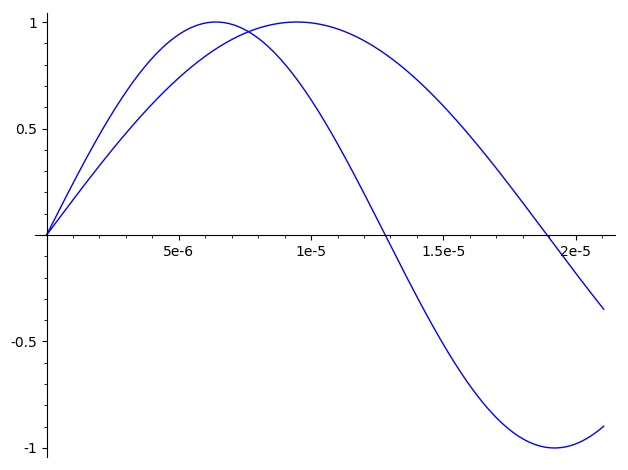

In [161]:
p = sage.plot.graphics.Graphics()
for i in range(n_layers):
    p += plot ( sin(k_values_d[i].rhs()* x), 0*lambda_d/32, lambda_d/3)

p.show()

In [162]:
disp_eq_brakes

[1.2803889789309366e-05,
 (4.07560470154422e-6)*pi + 1.2803889789309366e-05,
 (8.15120940308844e-6)*pi + 1.2803889789309366e-05,
 1.892215568863932e-05,
 (6.02310922360187e-6)*pi + 1.892215568863932e-05,
 0.0000120462184472037*pi + 1.892215568863932e-05]

In [163]:
disp_eq_brakes.sort()

In [164]:
for i in range(len(disp_eq_brakes)):
    display(Math(latex(disp_eq_brakes [i].n())))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [165]:
disp_eq_s.lhs ().subs(h  == disp_eq_brakes [0] + lambda_d/64)

0.0000857414620708909

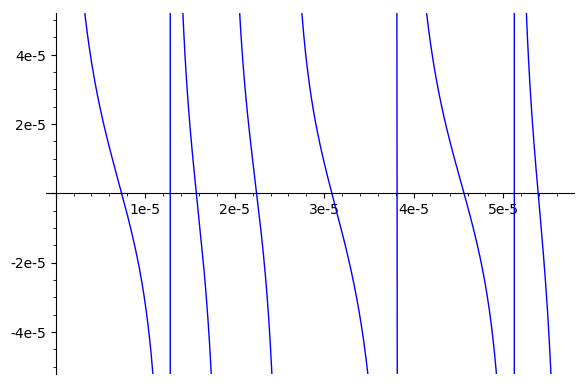

In [166]:
p = sage.plot.graphics.Graphics()
ylim = 5*10^-5
xeps = lambda_d/1024
p += plot(disp_eq_s.lhs(), xeps, disp_eq_brakes[0])
for i in range(len(disp_eq_brakes)-1):
    p += plot (disp_eq_s.lhs(), disp_eq_brakes[i] + xeps, disp_eq_brakes[i+1] - xeps, ymin = -ylim, ymax = ylim)

p.show()

In [167]:
h_lst = []

xeps = lambda_d/1024
for i in range(len(disp_eq_brakes)-1):
    try:
        
        h_lst += [find_root (disp_eq_s.lhs(), disp_eq_brakes[i] + xeps, disp_eq_brakes[i+1] - xeps)]
    except  Exception as ex:
        print(str(ex))
        print(disp_eq_brakes[i].n())
        print(disp_eq_brakes [i+1].n())

In [168]:
h_lst 

[1.5720024693785074e-05,
 2.2448399672557188e-05,
 3.084688315441931e-05,
 3.812811446043326e-05,
 4.560398282749686e-05]

In [169]:
def find_newton_root(f,x,a,b):
    df = f.diff(x)
    NewtonIt(x)=x-(f/df)(x)
    
    xn=(a+b)/2;                      # initial guess

    print (xn)
    for i in range(10):
        xn=N(NewtonIt(xn),digits=20)

        
        print (xn)

    return xn

In [170]:
h_lst_ =[]

xeps = lambda_d/1024
for i in range(len(disp_eq_brakes)-1):
    try:
        h_lst_ += [find_newton_root (disp_eq_s.lhs(),h,disp_eq_brakes[i] + xeps, disp_eq_brakes[i+1] - xeps)]
    except  Exception as ex:
        print(str(ex))
        print(disp_eq_brakes[i].n())
        print(disp_eq_brakes [i+1].n())



1.5863022738974343e-05
0.000015719810697436580244
0.000015720024741203350707
0.000015720024742913130757
0.000015720024742913130757
0.000015720024742913130757
0.000015720024742913130757
0.000015720024742913130757
0.000015720024742913130757
0.000015720024742913130757
0.000015720024742913130757
(2.03780235077211e-6)*pi + 1.5863022738974343e-05
0.000022448742212172960312
0.000022448399657387861471
0.000022448399652882903188
0.000022448399652882903188
0.000022448399652882903188
0.000022448399652882903188
0.000022448399652882903188
0.000022448399652882903188
0.000022448399652882903188
0.000022448399652882903188
(5.04935696257304e-6)*pi + 1.5863022738974343e-05
0.000030856041776493867280
0.000030846881178375183425
0.000030846883153945281561
0.000030846883153945376429
0.000030846883153945376429
0.000030846883153945376429
0.000030846883153945376429
0.000030846883153945376429
0.000030846883153945376429
0.000030846883153945376429
(7.08715931334515e-6)*pi + 1.5863022738974343e-05
0.000038128114464

/opt/sagemath-9.0/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:6: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.


In [171]:
h_lst

[1.5720024693785074e-05,
 2.2448399672557188e-05,
 3.084688315441931e-05,
 3.812811446043326e-05,
 4.560398282749686e-05]

In [172]:
h_sol = h_lst[0]

In [173]:
h_sol

1.5720024693785074e-05

In [182]:
E_rho_sol = []
for i in range(n_layers):
    E_rho_sol += [lambda rh,ph,z,  i=i: E_rho_s[i](rh,ph,z).subs(digit_values).subs(h == h_sol).subs(omega_value).subs(kappa == kappa_d1).subs(c_value).subs(k_values_d).subs (digit_values)]

In [183]:
E_z_sol = []
for i in range(n_layers):
    E_z_sol += [lambda rh,ph,z,  i=i: E_z_s[i](rh,ph,z).subs(digit_values).subs(h == h_sol).subs(omega_value).subs(kappa == kappa_d1).subs(c_value).subs(k_values_d).subs (digit_values)]

In [184]:
H_phi_sol = []
for i in range(n_layers):
    H_phi_sol += [lambda rh,ph,z,  i=i: H_phi_s[i](rh,ph,z).subs(digit_values).subs(h == h_sol).subs(omega_value).subs(kappa == kappa_d1).subs(c_value).subs(k_values_d).subs (digit_values)]

In [185]:
[E_rho_sol [1](rho,ph,z) for rho in [0..12]]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [192]:
E_rho_s[0](rho,ph,z)

-1/2*(B_z_0*cos(k_0*z) - A_z_0*sin(k_0*z))*k_0*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(m*varphi)/kappa

In [191]:
digit_values

[m == 0,
 a == 12,
 mu_0 == 1,
 epsilon_0 == 6.09102400000000,
 mu_1 == 1,
 epsilon_1 == 2.78890000000000]

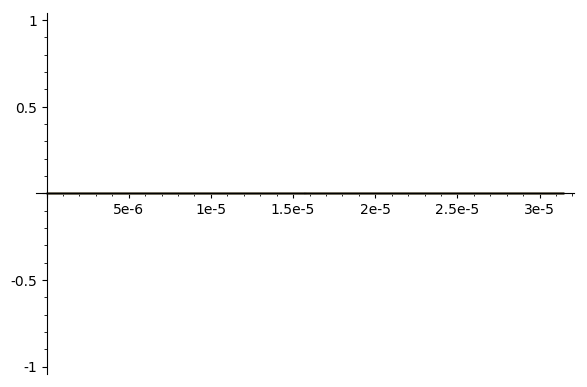

In [178]:
p = sage.plot.graphics.Graphics()

for i in range(n_layers):
    p += plot ([E_rho_sol[i](rh,ph,z).subs(rh == rho) for rho in [0..12]],(z, i*h_sol, (i+1)*h_sol))
p.show ()


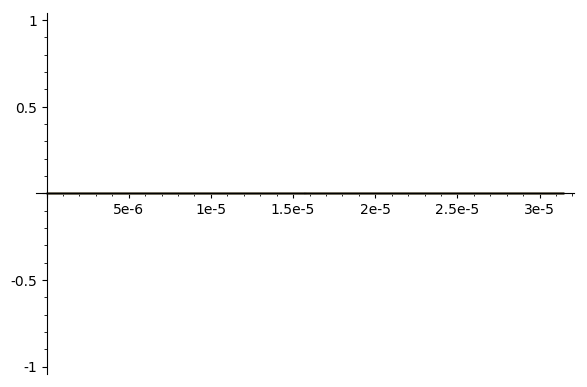

In [179]:
p = sage.plot.graphics.Graphics()

for i in range(n_layers):
    p += plot ([E_z_sol[i](rh,ph,z).subs(rh == rho) for rho in [0..12]],(z, i*h_sol, (i+1)*h_sol))
p.show ()


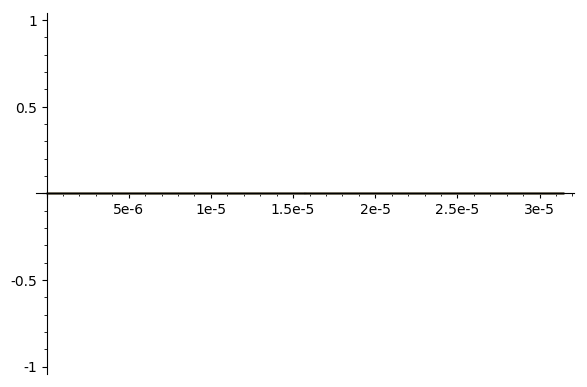

In [180]:
p = sage.plot.graphics.Graphics()

for i in range(n_layers):
    p += plot ([epsilon_d[i]*E_z_sol[i](rh,ph,z).subs(rh == rho) for rho in [0..12]],(z, i*h_sol, (i+1)*h_sol))
p.show ()

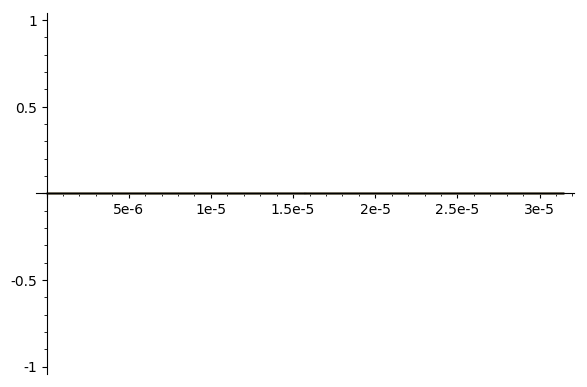

In [181]:
p = sage.plot.graphics.Graphics()

for i in range(n_layers):
    p += plot ([H_phi_sol[i](rh,ph,z).subs(rh == rho).imag_part() for rho in [0..12]],(z, i*h_sol, (i+1)*h_sol))
p.show ()
